# <font color='289C4E'>Projet 8: Propriétés spatiales des tables de hachage universelles
**Élèves**: Yong MOK & Gabriel PEREIRA DE CARVALHO

## <font color='289C4E'>Table de matières<font><a class='anchor' id='top'></a>
- [Python Imports](#imports)
- [Partie 1 - Table de hachage: présentation](#Partie1)
    - [Question S1](#S1)
    - [Question S2](#S2)
    - [Question S3](#S3)
- [Partie 2 - Hypothèse de hachage uniforme simple](#Partie2)
    - [Question T1](#T1)
    - [Question S4](#S4)
    - [Question T2](#T2)
    - [Question T3](#T3)
    - [Question T4](#T4)
- [Partie 3 - Méthode de hachage universel](#Partie3)
    - [Question T5](#T5)
    - [Question T6](#T6)
    - [Question T8](#T8)
    - [Question S5](#S5)
    - [Question T9](#T9)
    - [Question T10](#T10)
    - [Question S6](#S6)
- [Partie 4 - Méthode de hachage parfait](#Partie4)
    - [Question S7](#S7)
    - [Question T11](#T11)
    - [Question T12](#T12)
    - [Question S8](#S8)

<h2 align="center"> <font color='gray'>Python Imports</font></h2> <a class="anchor" id="imports"></a>

Dans cette section, on va importer tous les paquets qu'on ira utiliser plus tard.

In [363]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps

<h2 align="center"> <font color='gray'>Partie 1 - Table de hachage: présentation</font></h2><a class="anchor" id="Partie1"></a>

<h3 align="center"> <font color='blue'>Question S1</font></h3> <a class="anchor" id="S1"></a>

<div class="alert alert-block alert-info">
Écrire un programme qui, étant donné une table de hachage, une fonction de hachage et une donnée, modifie la table en insérant la donnée dans la bonne alvéole. Vous pouvez supposer que les données sont de type <b>Int</b>.

Appliquer votre programme pour insérer la donnée 7 via la fonction de hachage $h(n) = \lfloor\frac{n}{4}\rfloor$ (où $\lfloor x \rfloor$ est la partie entière de x) dans la table de hachage suivante (et afficher la table ainsi obtenue)
</div>

Pour ajouter une donnée $d$ dans la table de hachage $t$, on va:
1. calculer l'alvéole $h(d)$ où on va ajouter la donnée $d$.
2. ajouter $d$ dans l'alvéole $t[h(d)]$

In [364]:
def ajouterDonnee(tableHachage,
                  fonctionHachage,
                  donnee):
    alveole = fonctionHachage(donnee)
    tableHachage[alveole].append(donnee)

Dans l'exemple, on note que $h(7) = 1$. Donc, la donnée $7$ doit être ajouté à l'alvéole $t[1]$.

In [365]:
t = [[1,3,2,0],
     [6],
     [],
     [],
     [17,18]]

h = lambda d : math.floor(d/4)

ajouterDonnee(t, h, 7)
print(t)#on note que 7 est dans la bonne position

[[1, 3, 2, 0], [6, 7], [], [], [17, 18]]


<h3 align="center"> <font color='blue'>Question S2</font></h3> <a class="anchor" id="S2"></a>

<div class="alert alert-block alert-info">
Écrire un programme qui, étant donné une table de hachage (implémentée comme expliqué plus haut), une fonction de hachage et une donnée, teste si la donnée est présente dans la table. Vous pouvez supposer que les données sont de type <b>Int</b>. Vérifier votre programme en testant successivement la présence des données 7, 15 et 18 dans la table obtenue à la fin de S1.  
</div>

Pour chercher une donnée $d$ dans la table de hachage $t$, on va:
1. calculer l'alvéole $h(d)$ où chercher la donnée $d$.
2. utiliser la fonction *list.index()* pour trouver la donnée $d$ si elle est présente.
3. si la donnée a été trouvé, on retorne **True**, sinon on retorne **False**.

In [366]:
def chercherDonnee(tableHachage,
                   fonctionHachage,
                   donnee):
    alveole = fonctionHachage(donnee)
    try:
        cherche = tableHachage[alveole].index(donnee)
        return True
    except:
        return False

Dans l'exemple, on note que $7$ et $18$ sont présentes dans la table de hachage, mais $15$ ne l'est pas.

In [367]:
chercherDonnee(t, h, 7)

True

In [368]:
chercherDonnee(t, h, 15)

False

In [369]:
chercherDonnee(t, h, 18)

True

<h3 align="center"> <font color='blue'>Question S3</font></h3> <a class="anchor" id="S3"></a>

<div class="alert alert-block alert-info">

Écrire un programme qui, étant donné une <i>List</i> d’entiers compris entre $0$ et $19$, construit la table de hachage à $5$ alvéoles associée à la fonction de hachage $h(n) = \lfloor\frac{n}{4}\rfloor$, telle que chaque donnée ne soit présente qu’une fois dans la table (même si la donnée est présente en double dans la <i>List</i>). Il ne sera pas nécessaire de vérifier que les entiers de la List sont compris entre $0$ et $19$.
Utiliser votre programme pour constuire la table (que vous afficherez) otenue par insertion successives des données suivante (dans cet ordre) : $5$, $1$, $7$, $6$, $5$, $9$, $15$, $0$, $18$.

</div>

Pour construir la table de hachage, on va:
1. initialiser une table vide avec $5$ alvéoles
2. pour chaque donnée, vérifier si elle est présente dans la table de hachage
3. si la donnée n'est pas présente, on l'ajoute

In [370]:
def construirTableHachage(donnees,
                          fonctionHachage,
                          nombreAlveoles):
    tableHachage = [[] for i in range(nombreAlveoles)]
    for donnee in donnees:
        if chercherDonnee(tableHachage, fonctionHachage, donnee) == False:
            ajouterDonnee(tableHachage, fonctionHachage, donnee)
    return tableHachage

Dans l'exemple, on note que:

- $h(1) = h(0) = 0$
- $h(5) = h(7) = h(6) = 1$
- $h(9) = 2$
- $h(15) = 3$
- $h(18) = 4$

Donc, à la fin on doit trouver la table

$\begin{align}
t = [&[1,0],\\
    &[5,7,6],\\
    &[9],\\
    &[15],\\
    &[18]]
\end{align}$



In [371]:
nombreAlveoles = 5
donnees = [5,1,7,6,5,9,15,0,18]
construirTableHachage(donnees, h, nombreAlveoles)#comme attendu

[[1, 0], [5, 7, 6], [9], [15], [18]]

<h2 align="center"> <font color='gray'>Partie 2 - Hypothèse de hachage uniforme simple</font></h2><a class="anchor" id="Partie2"></a>

<h3 align="center"> <font color='blue'>Question T1</font></h3> <a class="anchor" id="T1"></a>

<div class="alert alert-block alert-info">

Supposons que $D_0,...,D_{n−1}$ sont i.i.d. de loi $\mathcal{U}([0, 1[)$, et $h:d \in [0, 1[ \to \lfloor dm \rfloor$. Montrer que l’hypothèse de hachage uniforme simple (HHUS) est vérifiée.

</div>

On note que $$\forall j \in [\![0,m]\!] \quad h(d) = j \iff dm - 1 < j \leq dm.$$

Donc, on a la condition suivante $$\frac{j}{m} \leq d < \frac{j+1}{m}.$$

Alors, $$\mathbb{P}(h(D_i) = j) = \mathbb{P}\left(\frac{j}{m} \leq D_i < \frac{j+1}{m}\right) = \frac{1}{m}.$$

On conclue que $h(D_i) \sim \mathcal{U}([\![0,m]\!])$. On note que les $h(D_i)$ sont indépendantes car les $D_i$ sont indépendantes.

On note encore que $$\forall i\not =j \quad \mathbb{P}(D_i \not= D_j) = 1$$ car la mesure de Lebesgue ne charge pas les points.

<h3 align="center"> <font color='blue'>Question S4</font></h3> <a class="anchor" id="S4"></a>

<div class="alert alert-block alert-info">
La table de hachage obtenue à <b>T1</b> est aléatoire (car les données sont des v.a.).

Écrire un programme qui simule cette table de hachage aléatoire avec $m = 5$ alvéoles en y insérant $n = 1000$ données i.i.d. de loi $\mathcal{U}([0, 1[)$. Utiliser votre programme pour simuler une telle table, puis afficher la taille de ses alvéoles à l’aide d’un histogramme.
</div>

Pour simuler la table de hachage aléatoire proposée, on va:
1. Simuler les réalisations $D_0,...,D_n-1$
2. Construir la table de hachage avec la fonction de [S3](#S3)

**Remarque:** Pour simuler les réalisation de la loi uniforme $\mathcal{U}([0,1[)$ on utilisera la fonction *rand()* du paquet *numpy.random*.

In [372]:
nombreRealisations = 1000
nombreAlveoles = 5

donnees = npr.rand(nombreRealisations)

h = lambda d : math.floor(d*nombreAlveoles)

tableHachage = construirTableHachage(donnees, h, nombreAlveoles)

tailleAlveoles = [len(tableHachage[i]) for i in range(nombreAlveoles)]

Pour construir un histogramme, on va utiliser le paquet *matplotlib.pyplot*. On note que ce qu'on attend c'est que tout les alvéoles aient la même taille une fois que la fonction de hachage suit une loi uniforme $\mathcal{U}([\![0,m]\!])$.

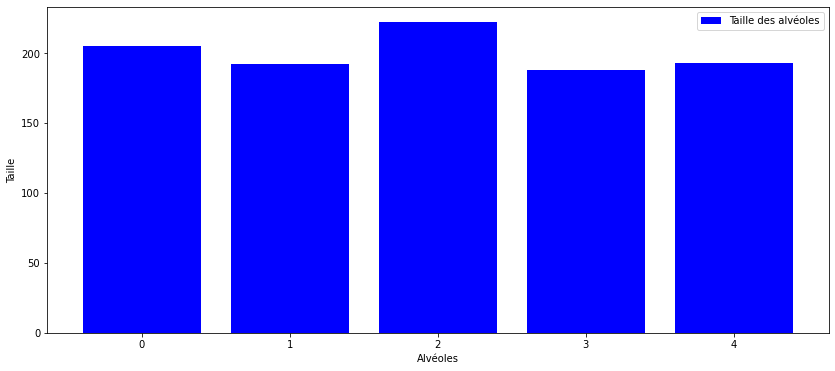

In [373]:
x = range(nombreAlveoles)#répresente chaque alvéole(axe x)
y = tailleAlveoles#répresente la taille de chaque alvéole(axe y)

plt.figure(figsize=(14,6))
plt.bar(x, y, color='blue', label = 'Taille des alvéoles')
plt.xlabel("Alvéoles")
plt.ylabel("Taille")
plt.legend()

<h3 align="center"> <font color='blue'>Question T2</font></h3> <a class="anchor" id="T2"></a>

<div class="alert alert-block alert-info">
Supposons que l’<i>HHUS</i> est vérifiée. 

Pour $0 \leq i, j \leq n − 1$, donner la probabilité que les données $D_i$ et $D_j$ soient hachées dans la même alvéole.
    
Donner la loi de $N_j(0 \leq j \leq m − 1)$.
</div>

Les données $D_i$ et $D_j$ sont hachées dans la même alvéole $\iff h(D_i) = h(D_j)$. Donc, on veut calculer $\mathbb{P}(h(D_i) = h(D_j))$.

$$\begin{align}
\mathbb{P}(h(D_i) = h(D_j)) &= \sum_{k=0}^{m-1} \mathbb{P}(h(D_i) = h(D_j)|h(D_j) = k)\cdot\mathbb{P}(h(D_j) = k)\\
&= \sum_{k=0}^{m-1} \mathbb{P}(h(D_i) = k)\cdot\mathbb{P}(h(D_j) = k) \quad \text{car $D_i$ et $D_j$ sont indépendantes.}\\
&= \sum_{k=0}^{m-1} \frac{1}{m^2}\\
&= \frac{1}{m}
\end{align}$$

On remarque que $\mathfrak{1}_{\{h(D_i) = j\}} \sim \mathcal{B} \left(\frac{1}{m}\right)$ une loi de Bernoulli.

On remarque que $\forall 0 \leq j \leq m - 1$, $N_j = \sum_{i=0}^{n-1} \mathfrak{1}_{\{h(D_i) = j\}}$ parce que $\forall 0 \leq i \leq n-1$ l'indicatrice vaut $1$ si $D_i$ est dans l'alveole $j$ et vaut $0$ s'il n'est pas. Donc on compte exactement le nombre de données présents.

Donc,

$$
N_j = \sum_{i=0}^{n-1} \mathfrak{1}_{\{h(D_i) = j\}} \sim \mathcal{B} \left(n, \frac{1}{m}\right) \text{une loi binomiale.}
$$

<h3 align="center"> <font color='blue'>Question T3</font></h3> <a class="anchor" id="T3"></a>

<div class="alert alert-block alert-info">

Supposons que l'<i>HHUS</i> est vérifiée. Soit $D$ une v.a. sur $\mathcal{D}$ qui est presque sûrement différente de toutes les $D_i (0 \leq i \leq n-1)$. Quelle est l'espérance du nombre de comparaisons de données qui devront être faîtes par l'algorithme de <b>S2</b> qui teste si $D$ est présente dans la table $H$ ?

</div>

Soit $C_D$ le nombre de comparaisons de données qu'on veut calculer. On sait que $C_D = N_{h(D)}$ car $D$ n'est pas dans la table presque sûrement.

Donc,

$$ \mathbb{E}(C_D) = \mathbb{E}(N_{h(D)}) = \frac{n}{m}$$

On conclue $\mathbb{E}(C_D) = \alpha$.

<h3 align="center"> <font color='blue'>Question T4</font></h3> <a class="anchor" id="T4"></a>

<div class="alert alert-block alert-info">

Supposons que l'<i>HHUS</i> est vérifiée. Soit $I$ une v.a. sur $[\![0,n-1]\!]$. Quelle est l'espérance du nombre de comparaisons qui devront être faîtes par l'algorithme de <b>S2</b> qui teste si $D_I$ est présente dans la table $H$ ?

</div>

Soit $C_{D_I}$ le nombre de comparaisons de données qu'on veut calculer. 

On sait que $\forall 0 \leq i \leq n-1$, le nombre de comparaisons $C_{D_i}$ pour trouver ${D_i}$ dans la table d'hachage est égal au nombre de données qui ont été insérées dans $h(D_i)$ avant $D_i$ plus 1.

Donc,

$$ C_{D_i} = 1 + \sum_{j=0}^{j=i-1} \mathfrak{1}_{h(D_j) = h(D_i)} \implies \mathbb{E}(C_{D_i}) = 1 + \frac{i}{m}$$

On remarque que 

$$C_{D_I} = \sum_{i=0}^{n-1} \mathfrak{1}_{I = i} C_{D_i}$$

Donc,
$$ \begin{align}
\mathbb{E}(C_{D_I}) &= \sum_{i=0}^{n-1} \mathbb{P}(I = i) \mathbb{E}(C_{D_i})\\
&= \sum_{i=0}^{n-1} \frac{1}{n} \mathbb{E}(C_{D_i})\\
&= \frac{1}{n} \sum_{i=0}^{n-1}\left(1 + \frac{i}{m}\right)\\
&= \frac{1}{n} \left( n + \frac{n(n-1)}{2m} \right)\\
&= 1 + \frac{n-1}{2m}\\
&= 1 + \frac{\alpha}{2} - \frac{1}{2m}
\end{align}$$

On conclue $\mathbb{E}(C_{D_I}) = 1 + \frac{\alpha}{2} - \frac{1}{2m}$.

<h3 align="center"> <font color='blue'>Question T5</font></h3> <a class="anchor" id="T5"></a>

<div class="alert alert-block alert-info">

Soit $d \in \mathcal{D}$ différente des données $d_0, ..., d_{n-1}$. Montrer que l'espérance du nombre de comparaisons qui devront être faîtes par l'algorithme qui teste si $d$ est présente dans la table $H$ est inférieure au facteur de remplissage $\alpha = n/m$.

</div>

On remarque que $\forall d \not= d'$ on a
$$\mathbb{P}(h_I(d) = h_I(d')) = \frac{|\{ 0 \leq j \leq q-1 : h_j(d) = h_j(d') \}|}{q} < \frac{1}{m}$$

Soit $C_d$ le nombre de comparaisons qu'on veut calculer. $C_d$ c'est égal au nombre de données dans l'alvéole $h_I(d)$

$$C_d = N_{h_I(d)} = \sum_{i=0}^{n-1} \mathfrak{1}_{h_I(d_i) = h_I(d)}$$

Donc $$ \mathbb{E}(C_d) =  \sum_{i=0}^{n-1} \mathbb{P}(h_I(d_i) = h_I(d)) < \frac{n}{m} \quad \text{car $\forall i, d_i \not = d$}$$.

On conclue $\mathbb{E}(C_d) < \alpha$.

<h3 align="center"> <font color='blue'>Question T6</font></h3> <a class="anchor" id="T6"></a>

<div class="alert alert-block alert-info">

Soit $i \in [\![0,n-1]\!]$. Montrer que l'espérance du nombre de comparaisons qui devront être faîtes par l'algorithme qui teste si $d_i$ est présente dans la table $H$ est inférieure à $1 + \alpha$.

</div>

Soit $C_{d_i}$ le nombre de comparaisons qu'on veut calculer.

Analogiquement à la question $\textbf{T4}$, on a 

$$ C_{d_i} = 1 + \sum_{j=0}^{j=i-1} \mathfrak{1}_{h_I(d_j) = h_I(d_i)}$$

On a

$$\mathbb{E}(C_{d_i}) = 1 + \sum_{j=0}^{j=i-1} \mathbb{P}(h_I(d_j) = h_I(d_i)) < 1 + \frac{i}{m} < 1 + \frac{n}{m} = 1 + \alpha$$

On conclue $ \mathbb{E}(C_{d_i}) < 1 + \alpha $.

<h3 align="center"> <font color='blue'>Question T7</font></h3> <a class="anchor" id="T7"></a>

<div class="alert alert-block alert-info">

Soient $l \in \mathbb{N}^*$, $p$ un nombre entier et $\mathcal{D} = (\mathbb{Z}_p)^l$. Pour $a \in \mathbb{Z}_p$, soit 

$$ h_a : d = (d_0, ..., d_{l-1}) \in \mathcal{D} \mapsto \sum_{j=0}^{l-1} d_ja^j \in \mathbb{Z}_p.$$

Étant donné deux éléments distincts $b,c$ de $\mathcal{D}$, montrer qu'il y a au plus $l-1$ éléments $a \in \mathbb{Z}_p$ tels que $h_a(b) = h_a(c)$.

</div>

Soient $b = (b_0, ..., b_{l-1})$ et $c = (c_0, ..., c_{l-1})$.

Supposons $h(b) = h(c) \iff \sum_{j=0}^{l-1} (b_j - c_j)a^j \equiv 0 \mod p$.

On remarque que $\sum_{j=0}^{l-1} (b_j - c_j)a^j$ est un polynome de degré au plus $l-1$ donc on a au plus $l-1$ racines.

<h3 align="center"> <font color='blue'>Question T8</font></h3> <a class="anchor" id="T8"></a>

<div class="alert alert-block alert-info">

Soient $p$ un nombre premier et $\mathcal{D} = (\mathbb{Z_p})^2$. Donner un entier $m$ et une collection de fonctions de hachage universelle.

</div>

Posons $m = 2$, $q = 3$ et les fonctions d'hachage

$$ \forall 0 \leq a \leq 2 \quad h_a : (d_0, d_1) \mapsto d_0 + ad_1$$

Par $\textbf{T7}$, $\forall b,c \in (\mathbb{Z_p})^2$ distinctes on sait qu'il y a au plus $1 < \frac{3}{2}$ fonction $h_a$ tel que $h_a(b) = h_a(c)$.

<h3 align="center"> <font color='blue'>Question S5</font></h3> <a class="anchor" id="S5"></a>

<div class="alert alert-block alert-info">

Écrire un programme qui, étant donné une <i>List</i> d'éléments de $(\mathbb{Z}_{11})^2$, construit une table de hachage par une méthode de hachage universelle. Utiliser votre programme pour construire la table contenant les données suivantes

$$ \texttt{dS5 = [[5,8], [0,0], [3,1], [10,5], [6,2], [1,5]]} $$

</div>

In [374]:
#m
nombreAlveolesS5 = 2

#Data
dS5 = [[5,8],[0,0],[3,1],[10,5],[6,2],[1,5]]

#Redefinir fonction h
hS5 = lambda d : ((d[0] + npr.choice(3)*d[1])%11)%nombreAlveolesS5

tableHachageS5 = construirTableHachage(dS5, hS5, nombreAlveolesS5)
print(tableHachageS5)


[[[5, 8], [0, 0], [3, 1], [6, 2], [1, 5]], [[10, 5]]]


Maintenant, on construi un histogramme pour régarder la taille des deux alvéoles.

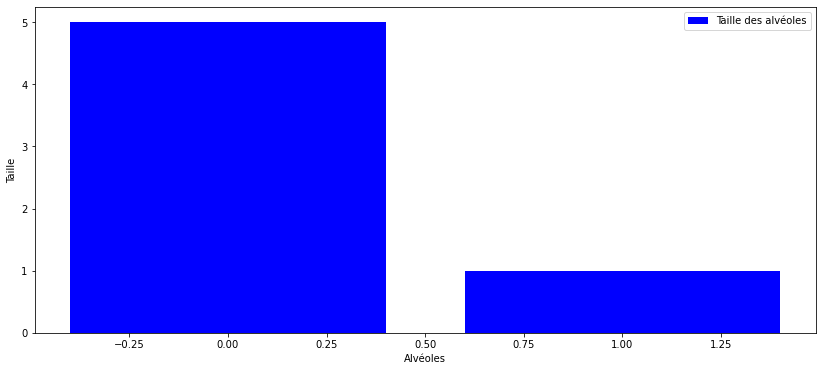

In [375]:
tailleAlveoles = [len(tableHachageS5[i]) for i in range(nombreAlveolesS5)]

x = range(nombreAlveolesS5)#répresente chaque alvéole(axe x)
y = tailleAlveoles#répresente la taille de chaque alvéole(axe y)

plt.figure(figsize=(14,6))
plt.bar(x, y, color='blue', label = 'Taille des alvéoles')
plt.xlabel("Alvéoles")
plt.ylabel("Taille")
plt.legend()

<h3 align="center"> <font color='blue'>Question T9</font></h3> <a class="anchor" id="T9"></a>

<div class="alert alert-block alert-info">

Supposons $m \geq n^2$. Montrer que l'espérance du nombre de collisions $X$ dans la table T est strictement inférieure à $1/2$. En déduire que la probabilité qu'il n'y ait aucune collision est strictement supérieure à $1/2$.

</div>

Par définition,

$$X = |\mathcal{C}| = \sum_{\{ k,l \} \subseteq [\![0,n-1]\!]} \mathfrak{1}_{\{ k,l\} \in \mathcal{C}}$$

Donc,

$$\begin{align}
\mathbb{E}(X) &= \sum_{\{ k,l \} \subseteq [\![0,n-1]\!]} \mathbb{P}(\{ k,l\} \in \mathcal{C})\\
& = \sum_{\{ k,l \} \subseteq [\![0,n-1]\!]} \mathbb{P}(h_I(d_k) = h_I(d_l))\\
& < \sum_{\{ k,l \} \subseteq [\![0,n-1]\!]} \frac{1}{m}\\
& = \frac{n(n-1)}{2} \cdot \frac{1}{m}\\
& \leq \frac{n(n-1)}{2} \cdot \frac{1}{n^2}\\
& < \frac{1}{2}
\end{align}$$

Donc, $\mathbb{E}(X) < \frac{1}{2}$.

Alors, on veut calculer la probabilité qu'il n'y ait aucune collision $\mathbb{P}(X = 0)$.

$$ X = 0 \iff \forall \{ k,l \} \subseteq [\![0,n-1]\!] \quad \mathfrak{1}_{\{ k,l\} \in \mathcal{C}} = 0$$

Donc, 

$$\begin{align}
\mathbb{P}(X = 0) &= \prod_{\{ k,l \} \subseteq [\![0,n-1]\!]}\mathbb{P}(\{ k,l\} \not\in \mathcal{C}) \quad \text{par indépendace}\\
& = \prod_{\{ k,l \} \subseteq [\![0,n-1]\!]} \mathbb{P}(h_I(d_k) \not= h_I(d_l))\\
& > \prod_{\{ k,l \} \subseteq [\![0,n-1]\!]} \left(1 - \frac{1}{m}\right)\\
& = \left( 1 - \frac{1}{m} \right)^{\frac{n(n-1)}{2}}\\
& > 1 - \frac{1}{m}\cdot \frac{n(n-1)}{2} \quad \text{par l'inégalité de Bernoulli}\\
& \geq 1 -  \frac{n(n-1)}{2n^2}\\
& > 1 - \frac{1}{2} = \frac{1}{2}
\end{align}$$

Donc, $\mathbb{P}(X=0) = \frac{1}{2}$.

<h3 align="center"> <font color='blue'>Question T10</font></h3> <a class="anchor" id="T10"></a>

<div class="alert alert-block alert-info">

Si $m \geq n^2$, étant donné $n$ données $d_0, ..., d_{n-1}$, on cherche une fonction de hachage $h$ parmi $h_0, ..., h_{q-1}$ qui n'a aucune collision.

Pour ça, on en choisit une au hasard (uniformément) parmi les fonctions $h_0, ..., h_{q-1}$ jusqu'à en trouver une sans collision (si la fonction choisie a une collision, il faut en rechoisir une aléatoirement indépendamment des tirages précédents).

Donner la loi du nombre de tirages que vous devrez faire avant de trouver une fonction de hachage sans collision.

Montrer que la probabilité que le nombre de tirages soit strictement supérieur à $k$ est inférieure à $2^{-k}$.

</div>

Soit $Y$ le nombre de tirages qu'on veut calculer.

Supposons qu'on a fait un tirage $h_i$. Si $X=0$ on a trouvé une fonction de hachage sans collision, par contre si $X \geq 1$ on doit faire un autre tirage.

Donc,

$$ \forall k \in \mathbb{N}^* \quad \mathbb{P}(Y = k) = \mathbb{P}(X \geq 1)^{k-1}(1 - \mathbb{P}(X \geq 1)) $$

Donc, $Y$ suit une loi geométrique de paramètre $\mathbb{P}(X \geq 1)$.

Pour calculer la probabilité que $Y$ soit strictement supérieur à $k$, on utilise la fonction de répartition $$\mathbb{P}(Y \leq k) = 1 - \mathbb{P}(X \geq 1)^k$$

Donc,

$$\begin{align}
\mathbb{P}(Y > k) &= 1 - \mathbb{P}(Y \leq k) \\
&= \mathbb{P}(X \geq 1)^k\\
&= (1 - \mathbb{P}(X = 0))^k\\
&< \left( \frac{1}{2} \right)^k = 2^{-k}
\end{align}$$



<h3 align="center"> <font color='blue'>Question S6</font></h3> <a class="anchor" id="S6"></a>

<div class="alert alert-block alert-info">

En déduire un programme qui, étant donné une List de $n \geq 14$ éléments de $(\mathbb{Z}_{211})^2$, construit une table de hachage à $m = 211$ alvéoles sans aucune collision.

Utiliser votre programme pour construire une table sans collision contenant les données suivantes

$$ \texttt{dS6 = [[5,8], [0,0], [3,1], [10,5], [6,2], [1,5], [4,2], [5,7], [3,5], [6,9], [0,2]]} $$

</div>

In [376]:
#Data
dS6 = [[5,8],[0,0],[3,1],[10,5],[6,2],[1,5],[4,2],[5,7],[3,5],[6,9],[0,2]]
nombreAlveoles = 211

#Tester si chaque avéoles est non cllision
def isCollision (tableHachage):
    for i in range(len(tableHachage)):
        if len(tableHachage[i]) > 1: #on a trouve collision
            return True
    return False
        
#Construit table sans collision
def construirSansCollision(donnees, nombreAlveoles):
    existeCollision = True
    tableHachage = []
    while(existeCollision):
        a = npr.choice(nombreAlveoles)
        fonctionHachage = lambda d : (d[0] + a*d[1])%nombreAlveoles
        tableHachage = construirTableHachage(donnees, fonctionHachage, nombreAlveoles)
        existeCollision = isCollision(tableHachage)
    return tableHachage

tableHachageS6 = construirSansCollision(dS6, nombreAlveoles)
print(tableHachageS6)

[[[0, 0]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [[3, 1]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [[0, 2]], [], [], [], [[4, 2]], [], [[6, 2]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [[1, 5]], [], [[3, 5]], [], [], [], [], [], [], [[10, 5]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [[5, 7]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [[5, 8]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [[6, 9]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


Maintenant, on construi un histogramme pour vérifier que la taille des alvéoles est bien $0$ ou $1$.

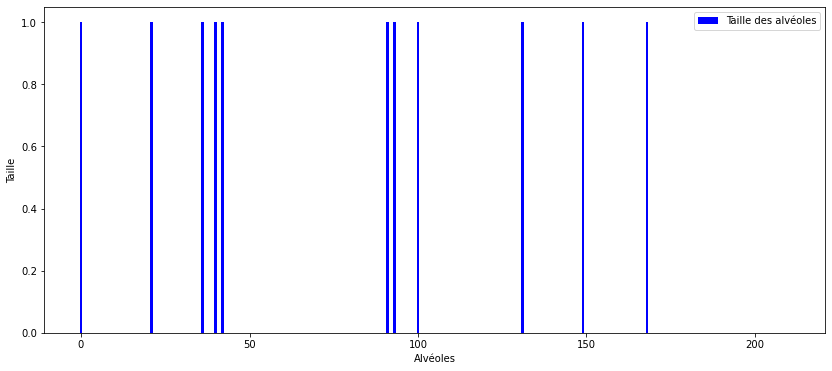

In [377]:
tailleAlveoles = [len(tableHachageS6[i]) for i in range(nombreAlveoles)]

x = range(nombreAlveoles)#répresente chaque alvéole(axe x)
y = tailleAlveoles#répresente la taille de chaque alvéole(axe y)

plt.figure(figsize=(14,6))
plt.bar(x, y, color='blue', label = 'Taille des alvéoles')
plt.xlabel("Alvéoles")
plt.ylabel("Taille")
plt.legend()

<h3 align="center"> <font color='blue'>Question S7</font></h3> <a class="anchor" id="S7"></a>

<div class="alert alert-block alert-info">

Écrire un programme qui, étant donné un entier $m$, une <i>List</i> de données et une fonction de hachage à valeurs dans $[\![0,m-1]\!]$, renvoit une <i>List</i> $l$ de taille $m$ telle que $l[j]$ est le nombre de données hachées dans l'alvéole $j$.

Afficher sous la forme d'un histograme la taille des alveoles de la table construite à <b>S5</b>.

</div>

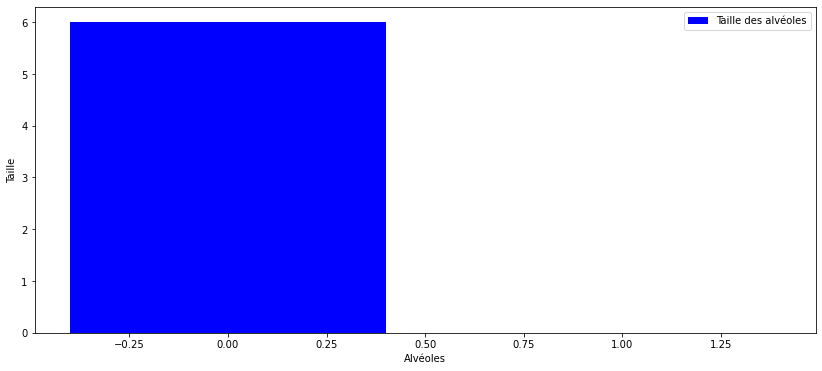

In [382]:
def calculerTailleAlveoles(donnees,fonctionHachage,nombreAlveoles):
    l  = [0]*nombreAlveoles
    for donnee in donnees:
        alveole = fonctionHachage(donnee)
        l[alveole]+=1
    return l

tailleAlveoles = calculerTailleAlveoles(dS5, hS5, nombreAlveolesS5)

x = range(nombreAlveolesS5)#répresente chaque alvéole(axe x)
y = tailleAlveoles#répresente la taille de chaque alvéole(axe y)

plt.figure(figsize=(14,6))
plt.bar(x, y, color='blue', label = 'Taille des alvéoles')
plt.xlabel("Alvéoles")
plt.ylabel("Taille")
plt.legend()


<h3 align="center"> <font color='blue'>Question T11</font></h3> <a class="anchor" id="T11"></a>

<div class="alert alert-block alert-info">

En supposant que $m \geq n$, montrer que l'espérance de la taille totale de la table construite par hachage parfait est strictement inférieure à $2n$.

</div>

Soient $Z$ la taille totale de la table de hachage et $$S_j = \{ (x,y) : (x,y) \text{ est une collision dans la table de l'alvéole } j \}.$$

Par définition, on peut compter $|S_j|$ de deux façons.

On a $|S_j| = 2X_j$ parce qu'on compte chaque collision deux fois et $|S_j| = N_j(N_j - 1)$.

Donc $N_j^2 = N_j + 2X_j$ où $X_j$. Alors, on a

$$ Z = \sum_{j=0}^{m-1} N_j^2 = \sum_{j=0}^{m-1} N_j + 2X_j \implies \mathbb{E}(Z) = \sum_{j=0}^{m-1} \mathbb{E}(N_j) + 2\mathbb{E}(X_j) $$

On sait que $\mathbb{E}(N_j) = \frac{n}{m}$ et $\mathbb{E}(X_j) < \frac{1}{2}$. Donc,

$$\begin{align}
\mathbb{E}(Z) &<  \sum_{j=0}^{m-1} \frac{n}{m} + 1\\
&= n + m \leq 2n
\end{align}$$

On conclue $\mathbb{E}(Z) < 2n$.

<h3 align="center"> <font color='blue'>Question T12</font></h3> <a class="anchor" id="T12"></a>

<div class="alert alert-block alert-info">

En supposant que $m \geq n$, montrer que, pour tout $0 < \epsilon < 1$, il existe un entier $t(\epsilon)$ tel que, avec probabilité supérieure à $1 - \epsilon$, la taille totale de la table de hachage ne dépasse pas $nt(\epsilon)$.

</div>

Soit $\epsilon \in ]0, 1[$. Posons $$t(\epsilon) = \frac{2}{1 - \epsilon}$$.

Par l'inégalité de Markov,
$$\begin{align}
\mathbb{P}(Z \geq nt(\epsilon)) &\leq \frac{\mathbb{E}(Z)}{nt(\epsilon)}\\
&\leq \frac{2n}{nt(\epsilon)}\\
&= \frac{2}{t(\epsilon)} = 1 - \epsilon
\end{align}$$

Donc $\mathbb{P}(Z < nt(\epsilon)) = 1 - \mathbb{P}(Z \geq nt(\epsilon)) \geq 1 - \epsilon$.

<h3 align="center"> <font color='blue'>Question S8</font></h3> <a class="anchor" id="S8"></a>

<div class="alert alert-block alert-info">

Donner une valeur approchée de l'espérance de la taille totale de la table de hachage à $m=11$ alvéoles construite par la méthode de hachage parfait via la liste de données

$$ \texttt{1Ex = [[5,8], [0,0], [3,1], [10,5], [6,2], [1,5], [4,7], [2,2], [10,7], [5,4]]}. $$

On garantira que l'erreur commise est inférieure à $4$, avec probabilité $0.5$.

</div>

Soit $Z_1, ..., Z_x$ des réalisations de $Z = \sum_{j=0}^{m-1} N_j^2$.

Par la loi des grandes nombres $$ \frac{Z_1 + ... + Z_x}{x} \to \mathbb{E}(Z) $$.

In [379]:
nombreRealisations = 10000
realisations = [0]*nombreRealisations

donnees = [[5,8], [0,0], [3,1], [10,5], [6,2], [1,5], [4,7], [2,2], [10,7], [5,4]]
nombreAlveoles = 11

for i in range(nombreRealisations):
    a = npr.choice(nombreAlveoles)
    fonctionHachage = lambda d : (d[0] + d[1]*a)%nombreAlveoles
    tailleAlveoles = calculerTailleAlveoles(donnees, fonctionHachage, nombreAlveoles)    
    for j in range(nombreAlveoles):
        realisations[i] += tailleAlveoles[j]**2

esperanceTailleTotale = np.mean(realisations)
print(esperanceTailleTotale)

17.648


<h3 align="center"> <font color='blue'>Question S9</font></h3> <a class="anchor" id="S9"></a>

<div class="alert alert-block alert-info">

Tracer un histogramme de la répartition empirique de la taille totale de hachage. Vous pouvez prendre un échantillon de taille 10000.

</div>

On va reultiliser les réalisations de la question $\textbf{S8}$.

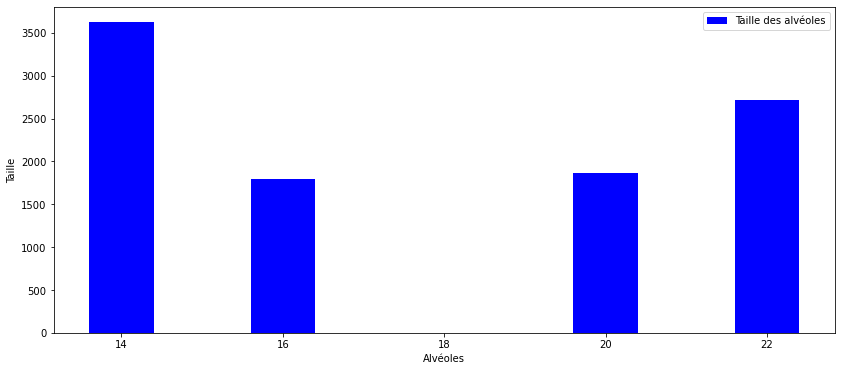

In [381]:
valeurs, frequence = np.unique(realisations, return_counts=True)

x = valeurs#répresente chaque alvéole(axe x)
y = frequence#répresente la taille de chaque alvéole(axe y)

plt.figure(figsize=(14,6))
plt.bar(x, y, color='blue', label = 'Taille des alvéoles')
plt.xlabel("Alvéoles")
plt.ylabel("Taille")
plt.legend()